**Problem Statement: Don’t Touch Your Face**

**Dataset: We will create our own dataset using the Teachable Machine.**

**“Class 1 Touch”**

**“Class 2 No hands”**

**“Class 3 No Touch w Hands”**

**Collect your images over 300 per class. Download as *.zip files and add your name information like below:**

**“Class 1 Touch.zip”**

**“Class 2 No hands.zip”**

**“Class 3 No Touch w Hands.zip”**

**Make the three zip files into one file like below:**

**Project_1_2_.zip**

**Submit the data file. We will combine all data and make it usable to everyone. Based on the collected data, you need to build your own CNN model to optimize the recognition performance based on knowledge we learned so far. Your team reports overall accuracy, confusion matrix, training/validation curves of accuracy and loss, and python code with detailed comments.**


**SOLUTION:**

**Step 1: Dataset Extraction**

The dataset is downloaded as a .zip file, and the images are extracted into the appropriate directories for each class. This step ensures that the dataset is organized and ready for use.

**Step 2: Directory Structure**

The folder structure is printed to confirm the extracted dataset and its organization into class-specific folders.

**Step 3: Data Splitting**

The dataset is split into training, validation, and test sets. This ensures the model has data to train on, validate during training, and test on after training.

**Step 4: Data Augmentation**

Data augmentation is applied to the training set to improve generalization, while the validation and test sets are only rescaled. This helps the model better handle various input scenarios.

**Step 5: CNN Model Architecture**

A CNN model is created with convolutional layers, batch normalization, max-pooling, and dropout to optimize classification performance. The model is compiled using the Adam optimizer and categorical cross-entropy loss.

**Step 6: Model Training**

The model is trained using the training set with early stopping and model checkpointing to prevent overfitting and save the best-performing model. The training is validated using a separate validation set.

**Step 7: Training Visualization**

Training and validation accuracy, as well as loss curves, are plotted to assess model performance across epochs, identifying potential overfitting or underfitting.

**Step 8: Confusion Matrix**

A confusion matrix is generated to visualize the model's performance, showing how well it predicts each class and identifying any misclassifications.

**Step 9: Classification Report**

A detailed classification report is generated, displaying precision, recall, F1-score, and support for each class, providing a comprehensive view of the model’s performance.

These steps ensure the successful creation, training, and evaluation of a face-touch detection model.

**Step 1: Data Loading and Extraction from Google Drive**

In this step, we import necessary libraries and mount Google Drive to access the dataset. The dataset is stored as a ZIP file in Google Drive, and we specify its path to ensure its existence. If the file is found, it is extracted to a specified directory in the Colab environment.

After extraction, we verify whether the dataset has been successfully
extracted by listing the files in the destination folder. This step
ensures that the data is correctly loaded and ready for preprocessing
before training the CNN model.

In [ ]:
# Import necessary libraries
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the zip file path inside Google Drive
zip_path = "/content/drive/MyDrive/Project_1_2_.zip"

# Check if the file exists in Google Drive
if os.path.exists(zip_path):
    print("File found:", zip_path)
else:
    print("File not found! Please check the path and try again.")

# Define extraction directory
extract_dir = "/content/dataset"

# Extract the zip file
if os.path.exists(zip_path):
    print("Extracting files...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extraction complete!")
else:
    print("Extraction skipped: Zip file not found.")

# Verify extracted files
if os.path.exists(extract_dir):
    print("Extracted files:", os.listdir(extract_dir))
else:
    print("Extraction failed or directory does not exist.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found: /content/drive/MyDrive/Project_1_2_.zip
Extracting files...
Extraction complete!
Extracted files: ['Project_1_2_']


**Step 2: Dataset Directory Structure Visualization**

In this step, we define a function to display the directory structure of the extracted dataset. The function recursively navigates through the dataset folder, printing only the directory names while maintaining the hierarchical structure.

This helps in understanding the organization of the dataset, including the number of subdirectories (such as classes in a classification problem) and their nesting levels. Proper structuring ensures that the dataset is correctly formatted for further preprocessing and model training.

In [ ]:
import os

# Function to print only the directory structure (without files)
def print_directory_structure(directory, level=0):
    # List the contents of the directory
    contents = os.listdir(directory)

    # Print the current directory's name with indentation for hierarchy level
    print('  ' * level + f'{directory}')

    # Iterate through the contents of the directory
    for item in contents:
        item_path = os.path.join(directory, item)

        # If the item is a directory, recursively print its structure
        if os.path.isdir(item_path):
            print_directory_structure(item_path, level + 1)

# Start from the extraction directory and print its structure
print_directory_structure(extract_dir)


/content/dataset
  /content/dataset/Project_1_2_
    /content/dataset/Project_1_2_/originaldata
      /content/dataset/Project_1_2_/originaldata/Class 2 No hands
      /content/dataset/Project_1_2_/originaldata/Class 3 No Touch w Hands
      /content/dataset/Project_1_2_/originaldata/Class 1 Touch


**Step 3: Dataset Splitting into Train, Validation, and Test Sets**

In this step, we prepare the dataset for model training by splitting it into three subsets: training, validation, and test sets. This ensures that the model is trained on one portion of the data, fine-tuned using another (validation set), and finally evaluated on an unseen test set.

The process involves:

1. Defining Paths: We specify the paths for the original dataset and the new directories for training, validation, and test sets.

2. Creating Folders: If the split directories do not exist, they are created.

3. Splitting the Data:
The dataset is categorized into different classes (subdirectories).
  * Images within each class are randomly shuffled.
  * A predefined ratio is used to divide the images into training (default: 80%), validation (10%), and test (10%).

4. Organizing the Data: The images are moved into their respective class folders within the train, validation, and test directories.

5. Verifying the Split: The script prints the contents of each split directory to confirm the process was successful.

This structured approach ensures that the dataset is well-organized and ready for training the CNN model.

In [ ]:
import os
import random
import shutil

# Define the paths for the original dataset and the new split directories
original_dataset_dir = '/content/dataset/Project_1_2_/originaldata'  # Path to the extracted data folder (ensure this points to the correct folder)
train_dir = '/content/dataset/train'  # Path for training images
valid_dir = '/content/dataset/validation'  # Path for validation images
test_dir = '/content/dataset/test'  # Path for testing images

# Create directories for the splits if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# Iterate through each class directory in the original dataset and split the data
def split_data(original_dataset_dir, train_dir, valid_dir, test_dir, test_ratio=0.1, valid_ratio=0.1):
    # Get the list of class names (subdirectories) in the original dataset directory
    class_names = os.listdir(original_dataset_dir)

    for class_name in class_names:
        class_dir = os.path.join(original_dataset_dir, class_name)

        # Only proceed if it's a directory (to avoid non-class files)
        if not os.path.isdir(class_dir):
            continue

        # Get list of all image files in the current class directory
        image_files = os.listdir(class_dir)

        # Shuffle the image files randomly
        random.shuffle(image_files)

        # Calculate the number of files for each split
        num_files = len(image_files)
        num_test = int(num_files * test_ratio)
        num_valid = int(num_files * valid_ratio)
        num_train = num_files - num_test - num_valid

        # Split the images into training, validation, and testing
        train_files = image_files[:num_train]
        valid_files = image_files[num_train:num_train + num_valid]
        test_files = image_files[num_train + num_valid:]

        # Create class subdirectories in the splits
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Move the files to their respective directories
        for file in train_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(train_dir, class_name, file))

        for file in valid_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(valid_dir, class_name, file))

        for file in test_files:
            shutil.move(os.path.join(class_dir, file), os.path.join(test_dir, class_name, file))

# Call the function to split the data into training, validation, and test sets
split_data(original_dataset_dir, train_dir, valid_dir, test_dir)

# Check the directory structure to ensure the split is done
print("Training directory structure:", os.listdir(train_dir))
print("Validation directory structure:", os.listdir(valid_dir))
print("Test directory structure:", os.listdir(test_dir))


Training directory structure: ['Class 2 No hands', 'Class 3 No Touch w Hands', 'Class 1 Touch']
Validation directory structure: ['Class 2 No hands', 'Class 3 No Touch w Hands', 'Class 1 Touch']
Test directory structure: ['Class 2 No hands', 'Class 3 No Touch w Hands', 'Class 1 Touch']


**Step 4: Data Preprocessing and Augmentation**

In this step, we preprocess the dataset and apply data augmentation techniques to enhance model generalization.

Key Steps:

1. Define Image Properties:

  * Input images are resized to 224x224 pixels (common for CNN models like ResNet, VGG, etc.).
  * Batch size is set to 32 for efficient training.

2. Data Augmentation (Training Data):

  * Random transformations like rotation, width/height shift, shear, zoom, and horizontal flip are applied.
  * Helps prevent overfitting and improves model robustness.

3. Rescaling (Validation & Test Data): Only pixel normalization (scaling values between 0 and 1) is applied to ensure consistency.

4. Data Generators:

  * train_generator loads and augments training images.
  * valid_generator and test_generator only rescale images for evaluation.

5. Dataset Summary:

  * The number of images in each category (train, validation, test) is displayed.
  * Class labels are printed to verify dataset structure.

This step ensures the dataset is properly prepared and ready for CNN model training.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training (no augmentation for validation and test)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation and test

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,  # Path to the validation data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,  # Path to the test data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)

# Check class names and dataset information
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {valid_generator.samples}")
print(f"Test samples: {test_generator.samples}")


Found 16162 images belonging to 3 classes.
Found 2018 images belonging to 3 classes.
Found 2018 images belonging to 3 classes.
Classes: ['Class 1 Touch', 'Class 2 No hands', 'Class 3 No Touch w Hands']
Training samples: 16162
Validation samples: 2018
Test samples: 2018


**Step 5: Building the CNN Model**

In this step, we define and compile a Convolutional Neural Network (CNN) for face-touch detection. The architecture includes multiple convolutional layers, batch normalization, dropout, and dense layers to improve performance and prevent overfitting.

Key Components of the CNN Model:

1. Convolutional Blocks:

  * Three convolutional blocks, each containing two Conv2D layers with ReLU activation and batch normalization to stabilize training.
  * MaxPooling is applied to downsample the feature maps.
  * Dropout layers are added to reduce overfitting.

2. Fully Connected Layers:

  * A Flatten layer converts the 2D feature maps into a 1D feature vector.
  * A 512-unit Dense layer with ReLU activation is used for feature learning.
  * A final Dense layer with softmax activation outputs probabilities for three classes (assuming three categories in the dataset).

3. Compilation:

  * Optimizer: Adam (efficient and adaptive learning rate optimization).
  * Loss Function: Categorical Crossentropy (for multi-class classification).
  * Metric: Accuracy (to evaluate classification performance).

5. Model Summary: The model architecture is printed to verify the layers and parameters.

This well-structured CNN model is now ready for training on the preprocessed dataset.

**Step 6: Model Training and Evaluation**

In this step, we train the CNN model using the preprocessed dataset and apply early stopping and model checkpointing to optimize training.

Key Components:

1. Callbacks for Training Optimization:

  * Early Stopping: Stops training if validation accuracy does not improve for 10 consecutive epochs, restoring the best weights.
  * Model Checkpoint: Saves the best-performing model based on validation accuracy.

2. Model Training:

  * The model is trained using the train_generator and validated with valid_generator.
  * The number of epochs is set to 50, but training stops early if no improvement is seen.
  * The training process prints real-time progress and accuracy/loss values.

3. Model Evaluation:

  * After training, the model is evaluated on the test dataset to assess its generalization ability.
  * The final test accuracy is printed.

5. Model Saving: The final trained model is saved as face_touch_final_model.h5 for future use or deployment.

This step ensures that the best-performing model is selected while preventing unnecessary overfitting.

In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model with Batch Normalization and Dropout layers
def build_model():
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')  # 3 classes for classification
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class classification
        metrics=['accuracy']
    )

    return model

# Create the model
model = build_model()

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 51,673,123 (197.12 MB)

 Trainable params: 51,671,203 (197.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Define callbacks for early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks for early stopping and saving the best model
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('face_touch_model.h5', save_best_only=True)
]

# Train the model using the data generators
history = model.fit(
    train_generator,  # Training data generator
    epochs=50,  # You can adjust the number of epochs based on your dataset and training time
    validation_data=valid_generator,  # Validation data generator
    callbacks=callbacks,  # Early stopping and checkpointing
    verbose=1
)


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_acc}")

# Save the final model
model.save('face_touch_final_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.4113 - loss: 1.5117

506/506 ━━━━━━━━━━━━━━━━━━━━ 280s 507ms/step - accuracy: 0.4114 - loss: 1.5112 - val_accuracy: 0.4708 - val_loss: 1.0361
Epoch 2/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.5565 - loss: 0.9398

506/506 ━━━━━━━━━━━━━━━━━━━━ 251s 495ms/step - accuracy: 0.5565 - loss: 0.9398 - val_accuracy: 0.5694 - val_loss: 0.9029
Epoch 3/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.6085 - loss: 0.8392

506/506 ━━━━━━━━━━━━━━━━━━━━ 246s 485ms/step - accuracy: 0.6085 - loss: 0.8391 - val_accuracy: 0.6591 - val_loss: 0.8560
Epoch 4/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.6689 - loss: 0.7306

506/506 ━━━━━━━━━━━━━━━━━━━━ 261s 516ms/step - accuracy: 0.6690 - loss: 0.7306 - val_accuracy: 0.7616 - val_loss: 0.5527
Epoch 5/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 261s 517ms/step - accuracy: 0.6672 - loss: 0.7486 - val_accuracy: 0.6283 - val_loss: 1.0410
Epoch 6/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 247s 487ms/step - accuracy: 0.7308 - loss: 0.6198 - val_accuracy: 0.6075 - val_loss: 1.2029
Epoch 7/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7602 - loss: 0.5622

506/506 ━━━━━━━━━━━━━━━━━━━━ 270s 503ms/step - accuracy: 0.7602 - loss: 0.5622 - val_accuracy: 0.8766 - val_loss: 0.3529
Epoch 8/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 253s 487ms/step - accuracy: 0.7838 - loss: 0.5113 - val_accuracy: 0.4425 - val_loss: 2.8049
Epoch 9/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 254s 501ms/step - accuracy: 0.7598 - loss: 0.5574 - val_accuracy: 0.7081 - val_loss: 0.6944
Epoch 10/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 226s 448ms/step - accuracy: 0.8093 - loss: 0.4588 - val_accuracy: 0.7671 - val_loss: 0.5667
Epoch 11/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 216s 426ms/step - accuracy: 0.8356 - loss: 0.4014 - val_accuracy: 0.8137 - val_loss: 0.4654
Epoch 12/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 215s 425ms/step - accuracy: 0.8207 - loss: 0.4365 - val_accuracy: 0.6442 - val_loss: 0.6872
Epoch 13/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8073 - loss: 0.4631

506/506 ━━━━━━━━━━━━━━━━━━━━ 227s 448ms/step - accuracy: 0.8074 - loss: 0.4630 - val_accuracy: 0.8964 - val_loss: 0.2258
Epoch 14/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 216s 427ms/step - accuracy: 0.8356 - loss: 0.4008 - val_accuracy: 0.7839 - val_loss: 0.5075
Epoch 15/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 262s 428ms/step - accuracy: 0.8370 - loss: 0.3986 - val_accuracy: 0.7696 - val_loss: 0.5465
Epoch 16/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8272 - loss: 0.4149

506/506 ━━━━━━━━━━━━━━━━━━━━ 218s 430ms/step - accuracy: 0.8273 - loss: 0.4149 - val_accuracy: 0.9301 - val_loss: 0.2013
Epoch 17/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 261s 428ms/step - accuracy: 0.7812 - loss: 0.5286 - val_accuracy: 0.6665 - val_loss: 0.7612
Epoch 18/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 218s 430ms/step - accuracy: 0.7600 - loss: 0.5627 - val_accuracy: 0.9039 - val_loss: 0.2406
Epoch 19/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.8160 - loss: 0.4349

506/506 ━━━━━━━━━━━━━━━━━━━━ 231s 456ms/step - accuracy: 0.8160 - loss: 0.4349 - val_accuracy: 0.9450 - val_loss: 0.1600
Epoch 20/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 221s 436ms/step - accuracy: 0.8348 - loss: 0.3797 - val_accuracy: 0.9277 - val_loss: 0.1678
Epoch 21/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8638 - loss: 0.3318

506/506 ━━━━━━━━━━━━━━━━━━━━ 227s 448ms/step - accuracy: 0.8638 - loss: 0.3318 - val_accuracy: 0.9509 - val_loss: 0.1351
Epoch 22/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 217s 428ms/step - accuracy: 0.8688 - loss: 0.3123 - val_accuracy: 0.9381 - val_loss: 0.1533
Epoch 23/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 220s 435ms/step - accuracy: 0.8737 - loss: 0.3064 - val_accuracy: 0.9123 - val_loss: 0.1910
Epoch 24/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 214s 423ms/step - accuracy: 0.7786 - loss: 0.5479 - val_accuracy: 0.8974 - val_loss: 0.2438
Epoch 25/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 216s 428ms/step - accuracy: 0.8361 - loss: 0.3877 - val_accuracy: 0.6323 - val_loss: 1.0980
Epoch 26/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 219s 433ms/step - accuracy: 0.8718 - loss: 0.3075 - val_accuracy: 0.9227 - val_loss: 0.1987
Epoch 27/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 266s 440ms/step - accuracy: 0.8808 - loss: 0.2883 - val_accuracy: 0.8196 - val_loss: 0.5847
Epoch 28/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8802 - loss:

506/506 ━━━━━━━━━━━━━━━━━━━━ 226s 447ms/step - accuracy: 0.8802 - loss: 0.2923 - val_accuracy: 0.9435 - val_loss: 0.1275
Epoch 29/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 257s 436ms/step - accuracy: 0.8919 - loss: 0.2659 - val_accuracy: 0.9440 - val_loss: 0.1406
Epoch 30/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8871 - loss: 0.2754

506/506 ━━━━━━━━━━━━━━━━━━━━ 227s 448ms/step - accuracy: 0.8871 - loss: 0.2754 - val_accuracy: 0.9613 - val_loss: 0.1095
Epoch 31/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 220s 433ms/step - accuracy: 0.8901 - loss: 0.2661 - val_accuracy: 0.7914 - val_loss: 0.5136
Epoch 32/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 217s 429ms/step - accuracy: 0.8864 - loss: 0.2852 - val_accuracy: 0.9470 - val_loss: 0.1276
Epoch 33/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 219s 433ms/step - accuracy: 0.9046 - loss: 0.2321 - val_accuracy: 0.8781 - val_loss: 0.3026
Epoch 34/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 216s 427ms/step - accuracy: 0.8819 - loss: 0.2912 - val_accuracy: 0.8692 - val_loss: 0.3116
Epoch 35/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 223s 441ms/step - accuracy: 0.8992 - loss: 0.2527 - val_accuracy: 0.9559 - val_loss: 0.1105
Epoch 36/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 220s 435ms/step - accuracy: 0.8801 - loss: 0.3051 - val_accuracy: 0.8999 - val_loss: 0.2173
Epoch 37/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 222s 440ms/step - accuracy: 0.8952 - los

506/506 ━━━━━━━━━━━━━━━━━━━━ 256s 505ms/step - accuracy: 0.8942 - loss: 0.2627 - val_accuracy: 0.9604 - val_loss: 0.0893
Epoch 40/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 217s 428ms/step - accuracy: 0.8925 - loss: 0.2693 - val_accuracy: 0.9182 - val_loss: 0.1992
Epoch 41/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9136 - loss: 0.2266

506/506 ━━━━━━━━━━━━━━━━━━━━ 270s 445ms/step - accuracy: 0.9136 - loss: 0.2266 - val_accuracy: 0.9648 - val_loss: 0.0860
Epoch 42/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 214s 423ms/step - accuracy: 0.8929 - loss: 0.2714 - val_accuracy: 0.9618 - val_loss: 0.0884
Epoch 43/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 221s 436ms/step - accuracy: 0.8803 - loss: 0.3006 - val_accuracy: 0.9514 - val_loss: 0.1173
Epoch 44/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 218s 431ms/step - accuracy: 0.9079 - loss: 0.2276 - val_accuracy: 0.9460 - val_loss: 0.1208
Epoch 45/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9179 - loss: 0.2054

506/506 ━━━━━━━━━━━━━━━━━━━━ 233s 461ms/step - accuracy: 0.9179 - loss: 0.2054 - val_accuracy: 0.9708 - val_loss: 0.0793
Epoch 46/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 216s 426ms/step - accuracy: 0.9240 - loss: 0.1892 - val_accuracy: 0.9529 - val_loss: 0.0941
Epoch 47/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9289 - loss: 0.1741

506/506 ━━━━━━━━━━━━━━━━━━━━ 222s 439ms/step - accuracy: 0.9289 - loss: 0.1741 - val_accuracy: 0.9628 - val_loss: 0.0777
Epoch 48/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 220s 434ms/step - accuracy: 0.9222 - loss: 0.1903 - val_accuracy: 0.4098 - val_loss: 2.8640
Epoch 49/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 221s 437ms/step - accuracy: 0.8141 - loss: 0.4529 - val_accuracy: 0.9594 - val_loss: 0.1042
Epoch 50/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 217s 429ms/step - accuracy: 0.8814 - loss: 0.2888 - val_accuracy: 0.8707 - val_loss: 0.2741
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9708 - loss: 0.0819


Test accuracy: 0.966303288936615


**Step 7: Visualizing Training Performance**

In this step, we analyze the training progress by plotting the accuracy and loss curves for both training and validation datasets.

Key Components:
1. Accuracy Plot:

  * The training and validation accuracies are plotted over the epochs.
  * Helps in identifying overfitting or underfitting issues.
2. Loss Plot:

  * Training and validation losses are plotted.
  * A decreasing loss indicates that the model is learning effectively.
3. Layout Adjustments:

  * Subplots: Two side-by-side graphs for better visualization.
  * egends and Titles: Clearly label accuracy and loss trends.
  * plt.tight_layout(): Ensures the plots are well-spaced.

This visualization helps in understanding model performance and identifying potential improvements.

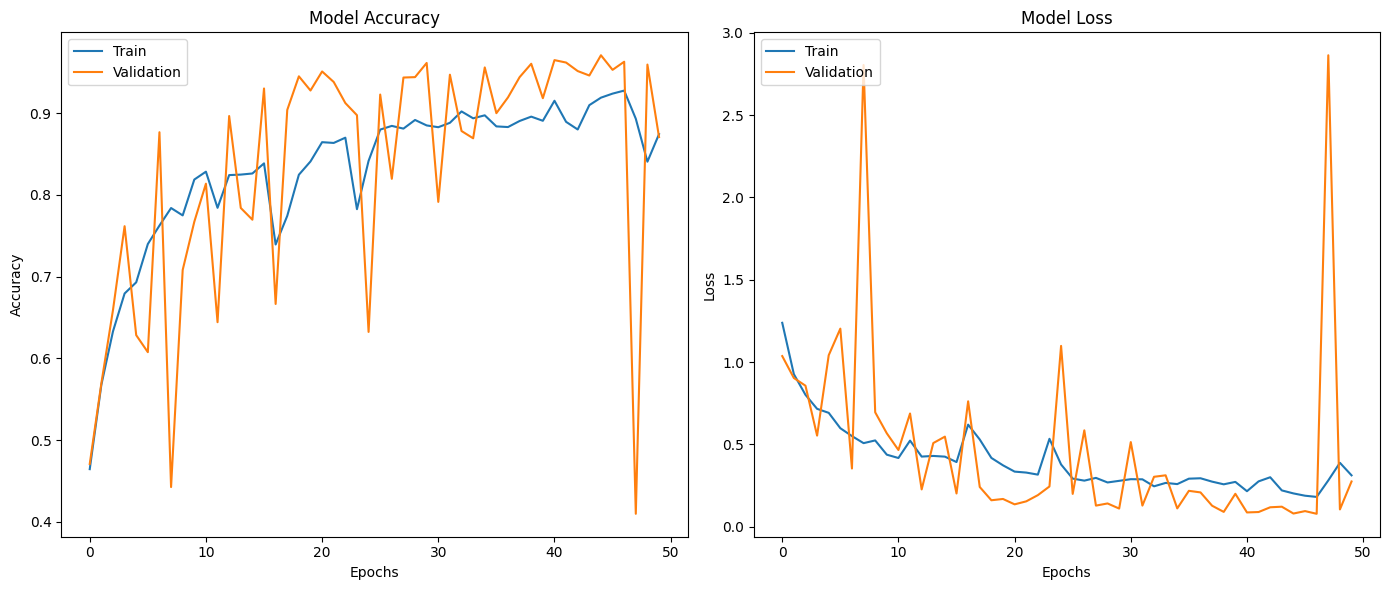

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot training & validation accuracy on the first subplot
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')

# Plot training & validation loss on the second subplot
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

# Show the plots
plt.tight_layout()  # To adjust the layout and prevent overlap
plt.show()


**Step 8: Confusion Matrix for Model Evaluation**

In this step, we evaluate the performance of the trained model by visualizing the confusion matrix. This matrix provides insights into the model's classification accuracy for each class and helps identify areas where the model might be making mistakes.

Key Components:
1. True Labels and Predictions:

  * True labels are fetched from the test set using test_generator.classes.
  * Predictions are generated by the model using model.predict().
  * The predictions are converted into class labels by taking the index with the highest probability (using np.argmax()).
2. Confusion Matrix Calculation: confusion_matrix() compares the true labels with the predicted class labels and computes the matrix.
3. Heatmap Visualization:

  * The confusion matrix is plotted as a heatmap using seaborn for easy visualization.
  * The heatmap displays the number of correct and incorrect predictions for each class.
  * Axis labels represent true classes (y-axis) and predicted classes (x-axis).
  * Color intensity reflects the frequency of predictions, making it easier to identify misclassifications.

This confusion matrix provides a more granular evaluation of model performance, helping identify specific areas for improvement in classification.

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step


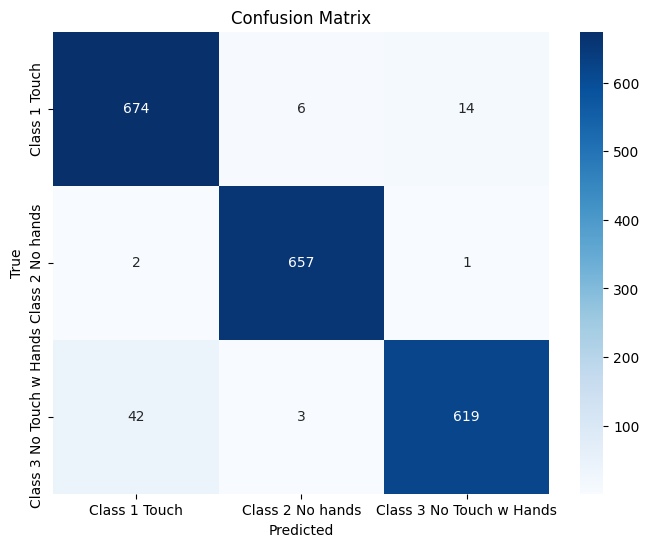

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get true labels and predictions for the test set
test_labels = test_generator.classes  # True labels for test set
predictions = model.predict(test_generator, verbose=1)  # Model predictions

# Convert predictions to class labels (use argmax to get the predicted class index)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Step 9: Classification Report**

In this step, we generate and print the classification report, which provides detailed metrics such as precision, recall, F1-score, and support for each class. These metrics are valuable in evaluating the model's performance in a multi-class classification task.

Key Components:
* Precision: Measures how many of the predicted positive samples were actually positive.
* Recall: Measures how many of the actual positive samples were correctly identified.
* F1-Score: The harmonic mean of precision and recall, providing a balance between them.
* Support: The number of true occurrences for each class in the test set.

The classification_report() function from scikit-learn calculates these metrics, and the results are printed for each class in the dataset.

This step gives a more comprehensive understanding of the model's performance beyond accuracy, helping to identify how well the model performs for each specific class.

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(test_labels, predicted_classes, target_names=test_generator.class_indices.keys()))


                          precision    recall  f1-score   support

           Class 1 Touch       0.94      0.97      0.95       694
        Class 2 No hands       0.99      1.00      0.99       660
Class 3 No Touch w Hands       0.98      0.93      0.95       664

                accuracy                           0.97      2018
               macro avg       0.97      0.97      0.97      2018
            weighted avg       0.97      0.97      0.97      2018

